# AP4 4 - TransMec

In [ ]:
from funcoesTermosol import *
from solver import *
from ipywidgets import interact

In [ ]:
input_name = input('Selecione o arquivo (1,2): ')

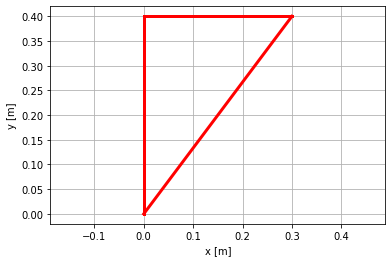

In [ ]:
entrada = f'entrada_{input_name}.xlsx'

[nn,N,nm,Inc,nc,F,nr,R] = importa(entrada)

plota(N, Inc)

In [ ]:
solver = Solver()

# Add nodes
nodes_transposed = N.T
for x, y in nodes_transposed:
    solver.add_node(x,y)

# Add elements
for n1, n2, elasticity, area in Inc:
    solver.create_element(n1, n2, elasticity, area)

# Add constraints
for node, direction in R:
    solver.add_constraint(node,direction)

In [ ]:
# Solve
reactions, strain, displacement = solver.solver(F,1e-8,1000)

------- Initializing solver -------

- Added Node 1 - (0.0, 0.0)

- Added Node 2 - (0.0, 0.4)

- Added Node 3 - (0.3, 0.4)

- Added Element: Node 1 - (0.0, 0.0) | Node 2 - (0.0, 0.4) | E=210000000000.0Pa | A=0.0002m²

- Added Element: Node 2 - (0.0, 0.4) | Node 3 - (0.3, 0.4) | E=210000000000.0Pa | A=0.0002m²

- Added Element: Node 3 - (0.3, 0.4) | Node 1 - (0.0, 0.0) | E=210000000000.0Pa | A=0.0002m²

- Added constraint to node 1 in x direction

- Added constraint to node 2 in x direction

- Added constraint to node 2 in y direction



In [ ]:
# Tensoes internas [Pa]
stress_element = np.array([[el.elasticity] for el in solver.elements])*strain
stress_element

In [ ]:
# Forças internas [N]
internal_forces = np.array([[el.area] for el in solver.elements])*stress_element
internal_forces

In [ ]:
geraSaida("saida", reactions, displacement, strain, internal_forces, stress_element)

In [5]:
def plot_new(valor):
    nn_new = solver.get_nodes()
    nn_new = (nn_new.T.reshape(displacement.shape) + (displacement*valor)).reshape(nn_new.T.shape).T
    plota(nn_new, Inc)

interact(plot_new, valor=(1e1, 1e4, 1e-1));

interactive(children=(FloatSlider(value=5005.0, description='valor', max=10000.0, min=10.0), Output()), _dom_c…

: 